In [1]:
import numpy as np
import math
import scipy.stats as sps
import matplotlib.pyplot as plt

%matplotlib inline

### 7.Доверительные интервалы. Задачи 1 и 2.
Условие 1: Сгенерируйте выборку $X_1, \ldots, X_{100}$ из распределения $P_{\theta}$ в теоретических задачах 6.1, 6.3, 6.4, 6.5. В задачах 6.1, 6.3, 6.4 возьмите $\theta = 10$, в задаче 6.5 возьмите $(\theta, \lambda) = (10, 3)$. Для уровня доверия $\alpha = 0.95$ для всех $n \leq 100$ постройте доверительные интервалы, полученные в теоретических задачах. Изобразите их на графиках в координатах $(n, \theta)$, используя mathplotlib.pyplot.fill_between.

Условие 2: Для $n = 100$ оцените вероятность попадания истинного значения $\theta$ в интервал (в каждой задаче). Для этого сгенерируйте достаточно много выборок (предложите, сколько нужно выборок), постройте по каждой из них интервалы и определите, сколько раз в интервалы попадает истинное значение $\theta$. Таким способом будет построена бернуллиевская выборка, по ней оцените вероятность.

In [2]:
#заданные константы
theta = 10
alpha = 0.95
lambd = 3
n = 100
num_of_samples = 100000

In [3]:
#Напишем функцию для визуализации доверительных интервалов.
def draw_confidence_interval(left, # левая граница интервала
                             right, # правая граница интервала
                             estimation = None, # если задана, то рисуется график оценки
                             sample = None, # если задано, то рисуются точки выборки
                             ylim = (None, None)): # ограничение по оси y
    plt.figure(figsize=(15, 5))
    size = np.linspace(0, len(left), len(left))
    if(sample is not None):
        plt.scatter(size, sample, alpha = 0.2, s = 40, label = 'sample')
    if(estimation is not None):
        plt.plot(size, estimation, color='green', linewidth = 2.5, label = 'estimation')
    if(ylim is not (None, None)):
        plt.ylim(ylim)
    plt.fill_between(size, left, right, alpha = 0.15)
    plt.xlabel('Size')
    plt.title('Sample by size')
    plt.grid()
    plt.show()

### Теоретическая задача 6.1
Выборка $X_1, \ldots, X_{n} ~ R[0, \theta]$ 

А) Статистика $S(x) = \overline{X}$. Теоретический доверительный интервал:
$\theta \in \left( \frac{\overline{X}}{\frac{1}{2} + \varepsilon}, \: \frac{\overline{X}}{\frac{1}{2} - \varepsilon} \right), \: \text{where} \: \varepsilon=\sqrt{\frac{1}{12\cdot(1-\alpha)\cdot n}}$

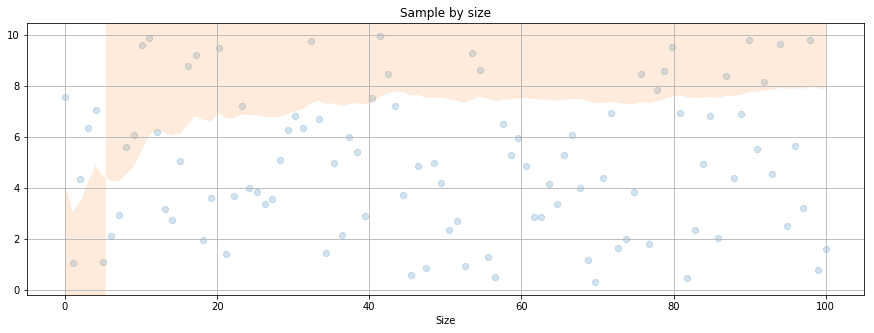

In [4]:
#Генерируем выборку
sample = sps.uniform.rvs(size = n, scale = theta)

#посчитаем левую и правую границы
left = np.zeros(len(sample))
right = np.zeros(len(sample))
for i in range(len(sample)):
    estimation = np.average(sample[:i+1])
    left[i] = estimation / ((1/2) + (1 / np.sqrt(12 * (1-alpha) * (i+1))))
    right[i] = estimation / ((1/2) - (1 / np.sqrt(12 * (1-alpha) * (i+1))))

#строим доверительные интервалы
draw_confidence_interval(left, right, sample = sample)

In [5]:
#посчитаем вероятность попадания истинного значения
samples = np.zeros(n)
in_interval = 0

for i in range(num_of_samples):
    samples = sps.uniform.rvs(size = n, scale = theta)
    estimation = np.average(samples[:n+1])
    left = estimation / ((1/2) + (1 / np.sqrt(12 * (1 - alpha) * (n+1))))
    right = estimation / ((1/2) - (1 / np.sqrt(12 * (1 - alpha) * (n+1))))
    if (theta >= left and theta <= right):
        in_interval = in_interval + 1

#Вероятность попадания истинного значения тета в интервал
print(('p = {}').format(in_interval / num_of_samples))

p = 0.99997


Б) Статистика $S(x) = X_{(1)}$. Теоретический доверительный интервал:
$\theta \in \left( \frac{X_{(1)}}{1-\sqrt[n]{0.5 - (\alpha/2)}}, \: \frac{X_{(1)}}{1-\sqrt[n]{0.5 + (\alpha/2)}} \right)$

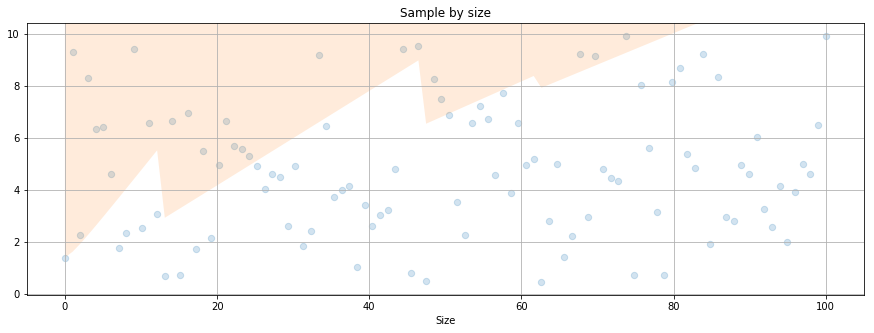

In [6]:
#Генерируем выборку
sample = sps.uniform.rvs(size = n, scale = theta)

#посчитаем левую и правую границы
left = np.zeros(len(sample))
right = np.zeros(len(sample))
for i in range(len(sample)):
    estimation = np.min(sample[:i+1])
    left[i] = estimation / (1 - (0.5 - (alpha/2))**(1/(i+1)))
    right[i] = estimation / (1 - (0.5 + (alpha/2))**(1/(i+1)))

#строим доверительные интервалы
draw_confidence_interval(left, right, sample = sample)

In [7]:
#посчитаем вероятность попадания истинного значения
samples = np.zeros(n)
in_interval = 0

for i in range(num_of_samples):
    samples = sps.uniform.rvs(size = n, scale = theta)
    estimation = np.min(samples[:n+1])
    left = estimation / (1 - (0.5 - (alpha/2))**(1/(n+1)))
    right = estimation / (1 - (0.5 + (alpha/2))**(1/(n+1)))
    if (theta >= left and theta <= right):
        in_interval = in_interval + 1

#Вероятность попадания истинного значения тета в интервал
print(('p = {}').format(in_interval / num_of_samples))

p = 0.94859


В) Статистика $S(x) = X_{(n)}$. Теоретический доверительный интервал:
$\theta \in \left( X_{(n)}, \: \frac{X_{(n)}}{\sqrt[n]{1 - \alpha}} \right)$

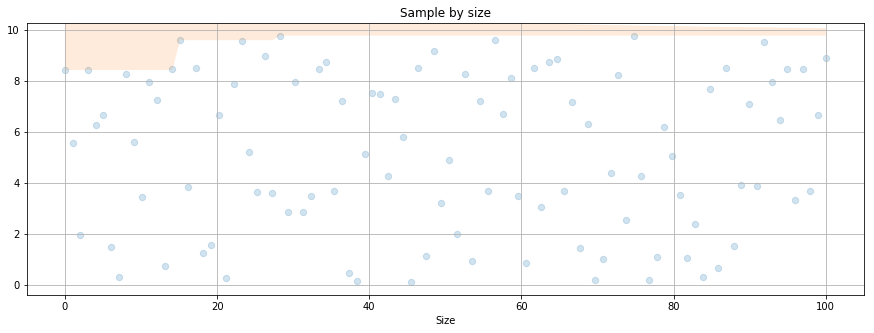

In [8]:
#Генерируем выборку
sample = sps.uniform.rvs(size = n, scale = theta)

#посчитаем левую и правую границы
left = np.zeros(len(sample))
right = np.zeros(len(sample))
for i in range(len(sample)):
    estimation = np.max(sample[:i+1])
    left[i] = estimation
    right[i] = estimation / ((1 - alpha)**(1/(i+1)))

#строим доверительные интервалы
draw_confidence_interval(left, right, sample = sample)

In [9]:
#посчитаем вероятность попадания истинного значения
samples = np.zeros(n)
in_interval = 0

for i in range(num_of_samples):
    samples = sps.uniform.rvs(size = n, scale = theta)
    estimation = np.max(samples[:n+1])
    left = estimation
    right = estimation / ((1 - alpha)**(1/(n+1)))
    if (theta >= left and theta <= right):
        in_interval = in_interval + 1

#Вероятность попадания истинного значения тета в интервал
print(('p = {}').format(in_interval / num_of_samples))

p = 0.94932


#### Выводы: Исходя из подсчитанных вероятностей, лучший интервал получен для $\overline{X}$.
#### Статистика $S(x) = \overline{X}: p = 0.99997$
#### Статистика $S(x) = X_{(1)}: p = 0.94859$
#### Статистика $S(x) = X_{(n)}: p = 0.94932$

### Теоретическая задача 6.3
Выборка $X_1, \ldots, X_{n} ~ Cauchy(1, \theta)$ 
Теоретический асимптотический доверительный интервал:
$\theta \in \left( \hat{\mu} - U_{\frac{1+\alpha}{2}} \frac{\pi}{2\sqrt{n}},\hat{\mu} - U_{\frac{1-\alpha}{2}} \frac{\pi}{2\sqrt{n}} \right)$, where $U_{\alpha}$ - $\alpha$-квантиль стандартного нормального распределения

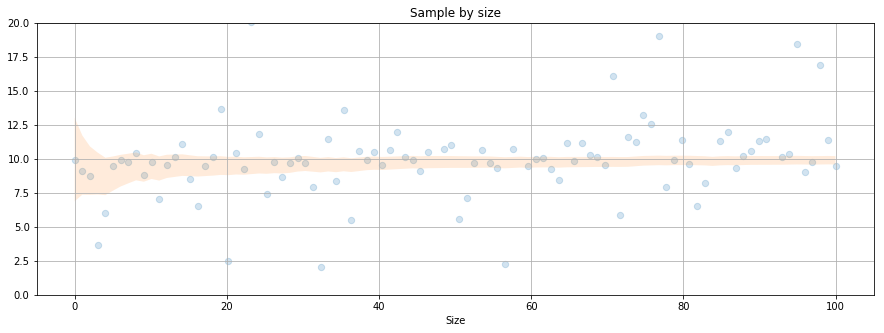

In [10]:
#Генерируем выборку
sample = sps.cauchy.rvs(size = n, loc = theta)

#посчитаем левую и правую границы
left = np.zeros(len(sample))
right = np.zeros(len(sample))
for i in range(len(sample)):
    estimation = np.median(sample[:i+1])
    quantile1 = sps.norm.ppf((1 + alpha) / 2.0)
    quantile2 = sps.norm.ppf((1 - alpha) / 2.0)
    left[i] = estimation - np.pi * quantile1 / (2 * np.sqrt(i+1))
    right[i] = estimation - np.pi * quantile2 / (2 * np.sqrt(i+1))

#строим доверительные интервалы
draw_confidence_interval(left, right, sample = sample, ylim = (0, 20))

In [11]:
#посчитаем вероятность попадания истинного значения
samples = np.zeros(n)
in_interval = 0

for i in range(num_of_samples):
    samples = sps.cauchy.rvs(size = n, loc = theta)
    estimation = np.median(sample[:n+1])
    quantile1 = sps.norm.ppf((1 + alpha) / 2.0)
    quantile2 = sps.norm.ppf((1 - alpha) / 2.0)
    left = estimation - np.pi * quantile1 / (2 * np.sqrt(n+1))
    right = estimation - np.pi * quantile2 / (2 * np.sqrt(n+1))
    if (theta >= left and theta <= right):
        in_interval = in_interval + 1

#Вероятность попадания истинного значения тета в интервал
print(('p = {}').format(in_interval / num_of_samples))

p = 1.0


### Теоретическая задача 6.4
Выборка $X_1, \ldots, X_{n} ~ Pois(\theta)$ 
Теоретический асимптотический доверительный интервал:
$\theta \in \left( \overline{X} - U_{\frac{1+\alpha}{2}} \frac{\sqrt{\overline{X}}}{\sqrt{n}},\overline{X} - U_{\frac{1-\alpha}{2}} \frac{\sqrt{\overline{X}}}{\sqrt{n}} \right)$, where $U_{\alpha}$ - $\alpha$-квантиль стандартного нормального распределения

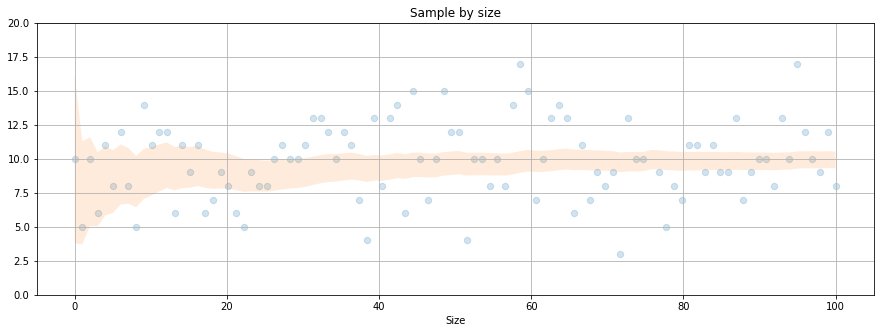

In [12]:
#Генерируем выборку
sample = sps.poisson.rvs(size = n, mu = theta)

#посчитаем левую и правую границы
left = np.zeros(len(sample))
right = np.zeros(len(sample))
for i in range(len(sample)):
    estimation = np.average(sample[:i+1])
    quantile1 = sps.norm.ppf((1 + alpha) / 2.0)
    quantile2 = sps.norm.ppf((1 - alpha) / 2.0)
    left[i] = estimation - quantile1 * np.sqrt(estimation) / (np.sqrt(i+1))
    right[i] = estimation - quantile2 * np.sqrt(estimation) / (np.sqrt(i+1))

#строим доверительные интервалы
draw_confidence_interval(left, right, sample = sample, ylim = (0, 20))

In [13]:
#посчитаем вероятность попадания истинного значения
samples = np.zeros(n)
in_interval = 0

for i in range(num_of_samples):
    samples = sps.poisson.rvs(size = n, mu = theta)
    estimation = np.average(sample[:n+1])
    quantile1 = sps.norm.ppf((1 + alpha) / 2.0)
    quantile2 = sps.norm.ppf((1 - alpha) / 2.0)
    left = estimation - quantile1 * np.sqrt(estimation) / (np.sqrt(n+1))
    right = estimation - quantile2 * np.sqrt(estimation) / (np.sqrt(n+1))
    if (theta >= left and theta <= right):
        in_interval = in_interval + 1

#Вероятность попадания истинного значения тета в интервал
print(('p = {}').format(in_interval / num_of_samples))

p = 1.0


### Теоретическая задача 6.5
Выборка $X_1, \ldots, X_{n} ~ Gamma(\theta, \lambda)$ 
Теоретический асимптотический доверительный интервал ($\lambda$ известно):
$\theta \in \left( \frac{1}{\overline{X}} (U_{\frac{1+\alpha}{2}} \frac{\sqrt{\lambda}}{\sqrt{n}}+ \lambda),\frac{1}{\overline{X}} (U_{\frac{1-\alpha}{2}} \frac{\sqrt{\lambda}}{\sqrt{n}}+ \lambda) \right)$, where $U_{\alpha}$ - $\alpha$-квантиль стандартного нормального распределения

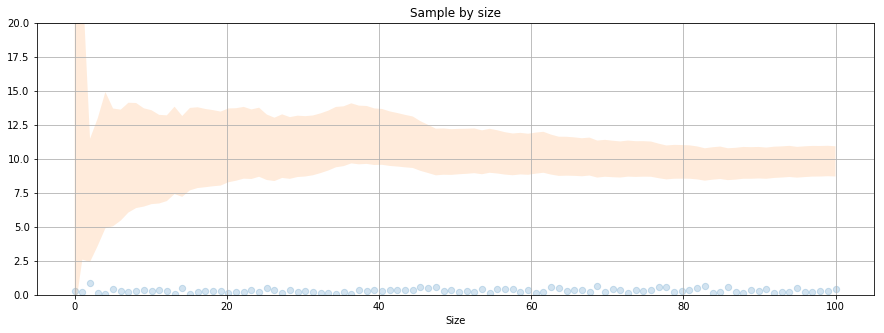

In [14]:
#Генерируем выборку
sample = sps.gamma.rvs(scale = 1 / theta, a = lambd, size = n)

#посчитаем левую и правую границы
left = np.zeros(len(sample))
right = np.zeros(len(sample))
for i in range(len(sample)):
    estimation = np.average(sample[:i+1])
    quantile1 = sps.norm.ppf((1 + alpha) / 2.0)
    quantile2 = sps.norm.ppf((1 - alpha) / 2.0)
    left[i] = (1.0 / estimation)*(quantile1 * (lambd/(i+1))**(0.5) + lambd)
    right[i] = (1.0 / estimation)*(quantile2 * (lambd/(i+1))**(0.5) + lambd)

#строим доверительные интервалы
draw_confidence_interval(left, right, sample = sample, ylim = (0, 20))

In [15]:
#посчитаем вероятность попадания истинного значения
samples = np.zeros(n)
in_interval = 0

for i in range(num_of_samples):
    samples = sps.gamma.rvs(scale = 1 / theta, a = lambd, size = n)
    estimation = np.average(sample[:n+1])
    quantile1 = sps.norm.ppf((1 + alpha) / 2.0)
    quantile2 = sps.norm.ppf((1 - alpha) / 2.0)
    left = (1.0 / estimation)*(quantile1 * (lambd/(n+1))**(0.5) + lambd)
    right = (1.0 / estimation)*(quantile2 * (lambd/(n+1))**(0.5) + lambd)
    if (theta >= left and theta <= right):
        in_interval = in_interval + 1

#Вероятность попадания истинного значения тета в интервал
print(('p = {}').format(in_interval / num_of_samples))

p = 0.0


#### Выводы: Чтобы выяснить вероятность попадания значения тета в доверительный интервал, достаточно поделить количество попаданий на количество всех проверок, таким образом, чем больше выборок мы сгенерируем - тем лучше. В результате, получаем:
#### Задача 6.3: p = 1.0
#### Задача 6.4: p = 1.0
#### Задача 6.5: p = 0.0